# Imports

In [ ]:
# General Imports
import numpy as np
import pandas as pd
import pickle
import os

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# PCA
from sklearn.decomposition import PCA
from matplotlib.patches import Circle

import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
#!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 9.3 MB/s eta 0:00:00


In [ ]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [ ]:
# à run pour colab uniquement
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Import des données

## Import

In [ ]:
# import des données

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

filepath = os.path.join(path, 'df')

with open(filepath, 'rb') as f:
    df_final = pickle.load(f)

df_final.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,order_status,payment_type,product_category
0,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,-0.80955,5.0,1.0,16.0,15.0,0.0,0.0,228.79538,delivered,credit_card,Furniture and Home Decor
1,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,3.15524,1.0,4.0,12.0,20.0,0.0,0.0,302.71858,delivered,credit_card,Furniture and Home Decor
2,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,-5.92488,5.0,5.0,19.0,16.0,0.0,0.0,29.14657,delivered,credit_card,Furniture and Home Decor
3,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,-0.28572,3.0,1.0,13.0,16.0,0.0,0.0,18.11744,delivered,credit_card,Furniture and Home Decor
4,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,0.78760,7.0,6.0,29.0,9.0,1.0,1.0,187.45960,delivered,credit_card,


# Jeu de données complet

## Preprocessing

In [ ]:
df_final.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'full_written_review',
       'written_review_title', 'distance', 'order_status', 'payment_type',
       'product_category'],
      dtype='object')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116467 entries, 0 to 117738
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_name_lenght         116467 non-null  float64
 1   product_description_lenght  116467 non-null  float64
 2   product_photos_qty          116467 non-null  float64
 3   product_weight_g            116467 non-null  float64
 4   payment_sequential          116467 non-null  float64
 5   payment_installments        116467 non-null  float64
 6   payment_value               116467 non-null  float64
 7   review_score                116467 non-null  float64
 8   review_time                 116467 non-null  float64
 9   order_time                  116467 non-null  float64
 10  delivery_error_time         116467 non-null  float64
 11  order_preparation_time      116467 non-null  float64
 12  shipping_limit_respect      116467 non-null  float64
 13  purchase_month

In [ ]:
df_final

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,order_status,payment_type,product_category
0,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,-0.80955,5.0,1.0,16.0,15.0,0.0,0.0,228.79538,delivered,credit_card,Furniture and Home Decor
1,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,3.15524,1.0,4.0,12.0,20.0,0.0,0.0,302.71858,delivered,credit_card,Furniture and Home Decor
2,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,-5.92488,5.0,5.0,19.0,16.0,0.0,0.0,29.14657,delivered,credit_card,Furniture and Home Decor
3,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,-0.28572,3.0,1.0,13.0,16.0,0.0,0.0,18.11744,delivered,credit_card,Furniture and Home Decor
4,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,0.78760,7.0,6.0,29.0,9.0,1.0,1.0,187.45960,delivered,credit_card,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117734,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,14.46880,6.17940,-11.16207,3.41656,1.58344,4.0,5.0,7.0,15.0,0.0,1.0,329.23572,delivered,boleto,Leisure and Miscellaneous
117735,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,4.44172,7.44054,-8.21198,1.42179,4.57821,4.0,2.0,4.0,8.0,0.0,0.0,188.57356,delivered,credit_card,Leisure and Miscellaneous
117736,60.0,575.0,1.0,870.0,1.0,5.0,56.04,1.0,4.07022,30.95237,7.79392,0.89044,3.10956,4.0,6.0,8.0,20.0,1.0,1.0,1662.21122,delivered,credit_card,Leisure and Miscellaneous
117737,59.0,452.0,1.0,710.0,1.0,2.0,711.07,5.0,2.98215,12.95146,-18.16760,2.87038,3.11887,11.0,4.0,3.0,21.0,0.0,0.0,628.26583,delivered,credit_card,Electronics and Technology


In [ ]:
df_quali = df_final.select_dtypes(include = 'object')
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116467 entries, 0 to 117738
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_status      116467 non-null  object
 1   payment_type      116464 non-null  object
 2   product_category  116467 non-null  object
dtypes: object(3)
memory usage: 3.6+ MB


In [ ]:
########## ORDINAL ENCODER ##########

# possible d'encoder plusieurs colonnes d'un coup (mais ici on en a une seule à encoder)
enc = OrdinalEncoder()
arr_ordinal = enc.fit_transform(df_quali[['order_status']])

enc.categories_

[array(['approved', 'delivered', 'invoiced', 'processing', 'shipped',
        'unavailable'], dtype=object)]

In [ ]:
# Mapping des catégories :
[dict(enumerate(mapping)) for mapping in enc.categories_]

[{0: 'approved',
  1: 'delivered',
  2: 'invoiced',
  3: 'processing',
  4: 'shipped',
  5: 'unavailable'}]

In [ ]:
arr_ordinal

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
arr_ordinal = arr_ordinal.reshape(-1, )

In [ ]:
# Recréer un dataframe avec les données encodées
quali_order = pd.DataFrame()
quali_order['order_status'] = arr_ordinal.tolist()

In [ ]:
quali_order

,order_status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
116462,1.0
116463,1.0
116464,1.0
116465,1.0


In [ ]:
########### LABEL ENCODER ##########
df_quali[['payment_type']]

,payment_type
0,credit_card
1,credit_card
2,credit_card
3,credit_card
4,credit_card
...,...
117734,boleto
117735,credit_card
117736,credit_card
117737,credit_card


In [ ]:
le = LabelEncoder()

# encoder variables une à une
le.fit(df_quali[['payment_type']])
le.classes_

array(['boleto', 'credit_card', 'debit_card', 'voucher', nan],
      dtype=object)

In [ ]:
# Mapping des catégories
dict(zip(le.classes_, le.transform(le.classes_)))

{'boleto': 0, 'credit_card': 1, 'debit_card': 2, 'voucher': 3, nan: 4}

In [ ]:
arr_label_payment = le.transform(df_quali[['payment_type']])
arr_label_payment

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Recréer un dataframe avec les données encodées

quali_payment = pd.DataFrame()
quali_payment[ 'payment_type'] = arr_label_payment

In [ ]:
le = LabelEncoder()
# encoder variables une à une
le.fit(df_quali[['product_category']])
le.classes_

array(['', 'Electronics and Technology', 'Fashion and Accessories',
       'Furniture and Home Decor', 'Leisure and Miscellaneous'],
      dtype=object)

In [ ]:
# Mapping des catégories
dict(zip(le.classes_, le.transform(le.classes_)))

{'': 0,
 'Electronics and Technology': 1,
 'Fashion and Accessories': 2,
 'Furniture and Home Decor': 3,
 'Leisure and Miscellaneous': 4}

In [ ]:
arr_label_product = le.transform(df_quali[['product_category']])
arr_label_product

array([3, 3, 3, ..., 4, 1, 3])

In [ ]:
# Recréer un dataframe avec les données encodées

quali_product = pd.DataFrame()
quali_product['product_category'] = arr_label_product

In [ ]:
"""
########## ONE HOT ENCODER ##########

# Visualiser df simplifié
print("----------------------------------------------------")
print('df simplifié')
print("----------------------------------------------------")
display(df_quali.head())

# OneHotEncoder
enc = OneHotEncoder(categories = 'auto')

for col in df_quali.columns:
  # Convertir type des colonnes en categories
  df_quali[col] = df_quali[col].astype('category')

  # Leur assigner des valeurs numériques et créer nouvelles colonnes
  df_quali[col] = df_quali[col].cat.codes

# Appliquer l'encoding
feature_arr = enc.fit_transform(df_quali).toarray()

feature_labels = enc.get_feature_names_out(df_quali.columns)

# Recréer un dataframe avec les données encodées
features = pd.DataFrame(feature_arr, columns = feature_labels)
print("----------------------------------------------------")
print('df encodé')
print("----------------------------------------------------")
display(features.head())"""

'\n########## ONE HOT ENCODER ##########\n\n# Visualiser df simplifié\nprint("----------------------------------------------------")\nprint(\'df simplifié\')\nprint("----------------------------------------------------")\ndisplay(df_quali.head())\n\n# OneHotEncoder\nenc = OneHotEncoder(categories = \'auto\')\n\nfor col in df_quali.columns:\n  # Convertir type des colonnes en categories\n  df_quali[col] = df_quali[col].astype(\'category\')\n\n  # Leur assigner des valeurs numériques et créer nouvelles colonnes\n  df_quali[col] = df_quali[col].cat.codes\n\n# Appliquer l\'encoding\nfeature_arr = enc.fit_transform(df_quali).toarray()\n\nfeature_labels = enc.get_feature_names_out(df_quali.columns)\n\n# Recréer un dataframe avec les données encodées\nfeatures = pd.DataFrame(feature_arr, columns = feature_labels)\nprint("----------------------------------------------------")\nprint(\'df encodé\')\nprint("----------------------------------------------------")\ndisplay(features.head())'

In [ ]:
########## CONCATENATION ##########
# concatener données qualitatives et quantitatives transformées

quali_product = quali_product.reset_index()
quali_payment = quali_payment.reset_index()
quali_order = quali_order.reset_index()

#features = features.reset_index()
df_quanti = df_final.select_dtypes(include = ['int', 'float'])
df_quanti = df_quanti.reset_index()

df = pd.concat([quali_product, quali_payment, quali_order, df_quanti], axis = 1)
df.head()

,index,product_category,index,payment_type,index,order_status,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance
0,0,3,0,1,0,1.0,0,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,-0.80955,5.0,1.0,16.0,15.0,0.0,0.0,228.79538
1,1,3,1,1,1,1.0,1,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,3.15524,1.0,4.0,12.0,20.0,0.0,0.0,302.71858
2,2,3,2,1,2,1.0,2,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,-5.92488,5.0,5.0,19.0,16.0,0.0,0.0,29.14657
3,3,3,3,1,3,1.0,3,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,-0.28572,3.0,1.0,13.0,16.0,0.0,0.0,18.11744
4,4,0,4,1,4,1.0,4,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,0.78760,7.0,6.0,29.0,9.0,1.0,1.0,187.45960


In [ ]:
# attention -> drop index
df.drop(['index'], axis = 1, inplace = True)

In [ ]:
df

,product_category,payment_type,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance
0,3,1,1.0,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,-0.80955,5.0,1.0,16.0,15.0,0.0,0.0,228.79538
1,3,1,1.0,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,3.15524,1.0,4.0,12.0,20.0,0.0,0.0,302.71858
2,3,1,1.0,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,-5.92488,5.0,5.0,19.0,16.0,0.0,0.0,29.14657
3,3,1,1.0,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,-0.28572,3.0,1.0,13.0,16.0,0.0,0.0,18.11744
4,0,1,1.0,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,0.78760,7.0,6.0,29.0,9.0,1.0,1.0,187.45960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116462,4,0,1.0,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,14.46880,6.17940,-11.16207,3.41656,1.58344,4.0,5.0,7.0,15.0,0.0,1.0,329.23572
116463,4,1,1.0,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,4.44172,7.44054,-8.21198,1.42179,4.57821,4.0,2.0,4.0,8.0,0.0,0.0,188.57356
116464,4,1,1.0,60.0,575.0,1.0,870.0,1.0,5.0,56.04,1.0,4.07022,30.95237,7.79392,0.89044,3.10956,4.0,6.0,8.0,20.0,1.0,1.0,1662.21122
116465,1,1,1.0,59.0,452.0,1.0,710.0,1.0,2.0,711.07,5.0,2.98215,12.95146,-18.16760,2.87038,3.11887,11.0,4.0,3.0,21.0,0.0,0.0,628.26583


In [ ]:
# Vérifier qu'il ne reste pas de NaN
df.isna().sum().sum()

0

In [ ]:
# standardisation - A DEPLACER AVANT ENCODING ?

scaler = StandardScaler()
df_std = scaler.fit_transform(df) # attendre un peu
df_std = pd.DataFrame(data = df_std, columns = df.columns)

In [ ]:
# Question -> utiliser MinMaxScaler à la place ?

In [ ]:
df_std.shape

(116467, 23)

## Kmeans

In [ ]:
# K Means Clustering
# = algo itératif qui fonctionne en 2 étapes :

# 1) on affecte les points du dataset au centroïde le plus proche
# 2) puis on calcule la moyenne de chaque cluster et on déplace chaque centroïde au centre de son cluster

# et ainsi de suite jusqu'à ce que les centroïdes convergent à une position d'équilibre

# selon la position initiale des centroïdes, l'algo k-means peut donner de mauvais clusters (converger vers de mauvaises positions)
# pour éviter ce pb, on execute algo plusieurs fois en modifiant les positions de départ/la position initiale du centroïde

# pour chaque résultat donné, on mesure la distance entre les points d'un cluster et le centre de ce dernier et on retient la solution pour laquelle la somme de ces distances
# est la plus petite

# en gros, cherche la position des centres qui minimise la distance entre les points d'un cluster et le centre de ce dernier
# équivaut plus ou moins à minimiser la variance des clusters

### K optimal

In [ ]:
# choix nb cluster -> voir méthodes elbow et coefficients de silhouette

In [ ]:
%%time
# Elbow method
# -> detecter une zone de coude dans la minimisation du coût (inertia)

inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters = k).fit(df_std)
    inertia.append(model.inertia_)

# loooooooooong

CPU times: user 3min 8s, sys: 17 s, total: 3min 25s
Wall time: 2min 26s


Text(0, 0.5, 'coût du modèle')

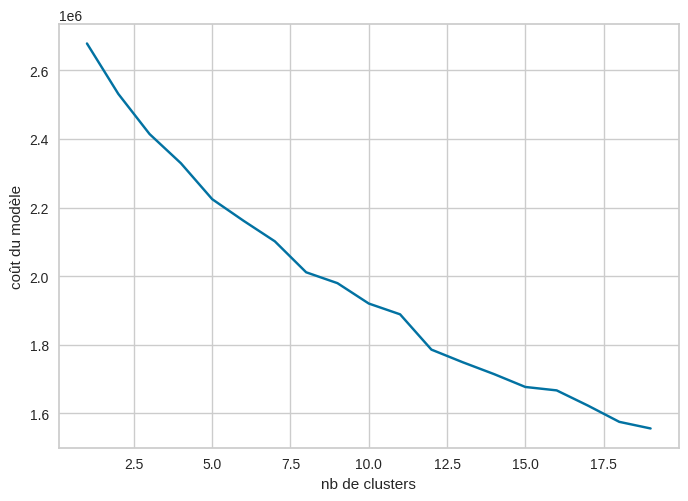

In [ ]:
# plot le coude
plt.plot(K_range, inertia)
plt.xlabel('nb de clusters')
plt.ylabel('coût du modèle')

In [ ]:
# https://www.kaggle.com/code/mesofianeyou/customer-segmentation-with-k-means

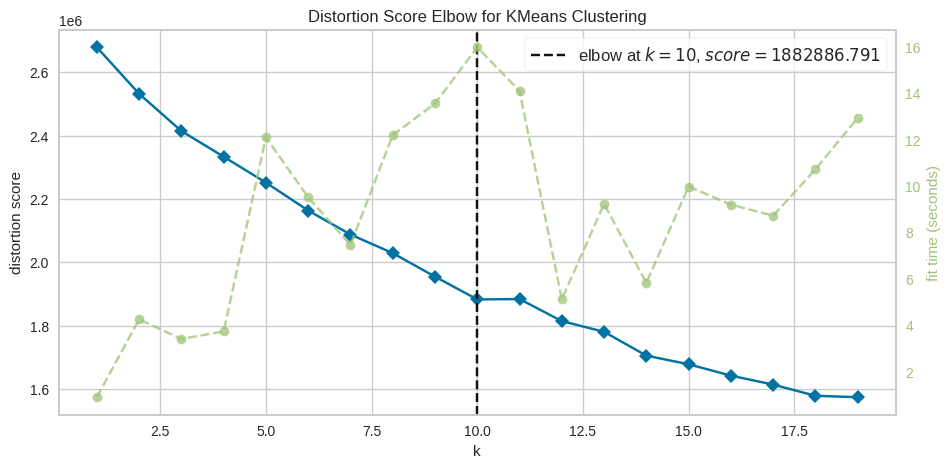

CPU times: user 3min 20s, sys: 17.7 s, total: 3min 38s
Wall time: 2min 50s


<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
%%time
# autre méthode
#!pip install yellowbrick

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 20), size = (1080, 500)) # on teste de k = 1 à k = 20 - pas pertinent d'aller au dessus dans notre cas

visualizer.fit(df_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# extraire le nombre de clusters optimal (même si pas franchement un joli coude)
k = visualizer.elbow_value_
print(f'Nombre optimal de clusters : k = {k}')

10

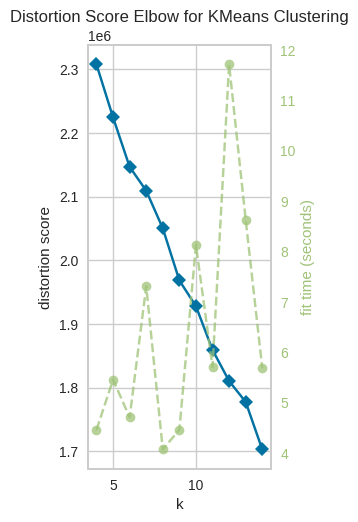

KeyboardInterrupt: ignored

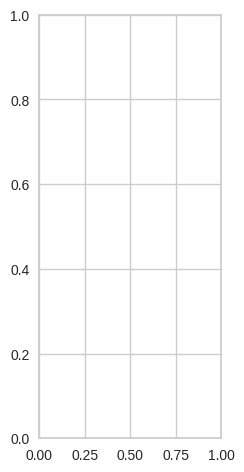

In [ ]:
%%time
# attention, long

# metric par défaut du KElbowVisualizer = distortion
# comparer le résultat obtenu avec d'autres métriques d'évaluation

# Elbow method with differents metrics
metrics = ['distortion', 'silhouette', 'calinski_harabasz']
i = 0

#fig, axes = plt.subplots(nrows = 1, ncols = 3, sharex = False, sharey = False, figsize = (24, 8))
plt.figure()
for m in metrics:
  i+=1
  plt.subplot(int(f'13{i}'))
  visualizer = KElbowVisualizer(KMeans(), k = (4, 15), metric = m)
  visualizer.fit(df_std)
  visualizer.show()

plt.show()

In [ ]:
# essayer les différentes métriques séparemment

In [ ]:
# voir si on a le même k optimal avec les différentes métriques

In [ ]:
# Silhouette score

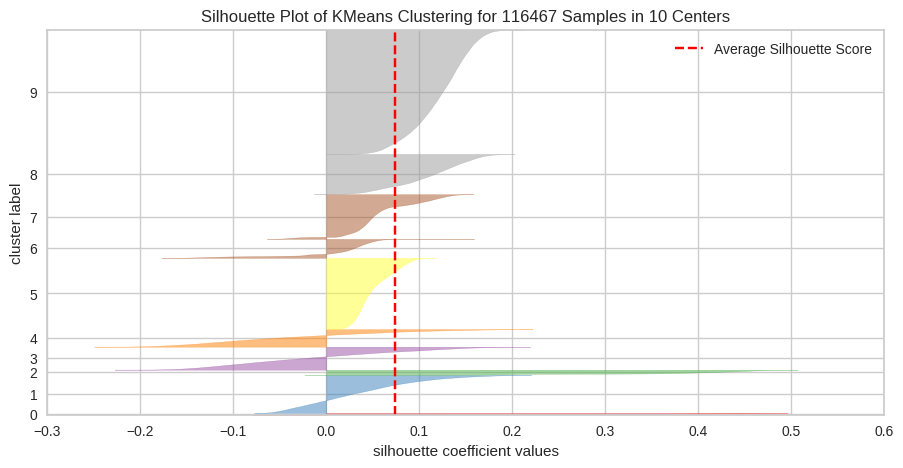

CPU times: user 6min 16s, sys: 1min 34s, total: 7min 50s
Wall time: 7min 55s


<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 116467 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
%%time

kmeans1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42) # attention -> prendre même random state partout
visualizer = SilhouetteVisualizer(kmeans1, size = (1080, 500))

visualizer.fit(df_std)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
# Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of
# how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of
# clusters visually. This measure has a range of [-1, 1].

# Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.
# A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values
# indicate that those samples might have been assigned to the wrong cluster.

# Silhoutte plots may be used to analyze the appropriateness of a chosen number of clusters for the given data, by bumping up the cluster
# count every time that you see a poorly fitted cluster. They are a heavier approach to cluster number selection than the elbow plot,
# but also tell you much more about the composition of the clusters themselves.

In [ ]:
# Nb de points par 'blob'
# Regarder si un blob ( = cluster) à des données plus faiblement 'fittées'

# Silhouette Coefficient
# The silhouette coefficient measures the quality of clustering by computing the average distance between each data point and other points within the same cluster,
# relative to the distance between the data point and points in neighboring clusters. The coefficient ranges from -1 to +1, where a higher value indicates better clustering.

### Clustering

In [ ]:
# Maintenant qu'on a notre k optimal -> on peut faire notre clustering avec Kmeans

In [ ]:
%%time

model = KMeans(n_clusters = k # nb de clusters qu'on veut avoir
               #n_init = 10, # nb d'initialisations qu'on veut faire - 10 = valeur par défaut
               #max_iter = 300, # nb d'itérations max - par défaut 300
               #init = 'k-means++'' # quelle stratégie d'initialisation on utilise
               )

# K-Means++ -> méthode d'initialisation qui consiste à placer les centroïdes sur des points du dataset éloignés les uns des autres - facilite convergence

model.fit(df_std) # pour entrainer modèle
# model.labels_ ou
model.predict(df_std)

CPU times: user 9.59 s, sys: 934 ms, total: 10.5 s
Wall time: 7.47 s


array([0, 9, 3, ..., 3, 4, 0], dtype=int32)

In [ ]:
# Evaluation du clustering : silhouette score
silhouette_kmeans = round(silhouette_score(df_std, model.fit_predict(df_std)), 2)
print('The average silhouette score is:', silhouette_kmeans)

The average silhouette score is: 0.06


In [ ]:
# A score closer to 1 indicates that the clustering is good, while a score closer to -1 indicates that the clustering is bad.

### Description des clusters

In [ ]:
# Créer une copie du df pour ajouter les clusters
df_clusters = df_std

In [ ]:
# Description des clusters obtenus

labels = model.labels_
df_clusters['cluster_num'] = labels
df_clusters.head()

,product_category,payment_type,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,cluster_num
0,-0.13984,0.1137,-0.12521,-0.77904,0.54849,-0.70603,1.73278,-0.12925,-0.33947,-0.09498,-0.03169,0.18454,-0.39232,0.07997,1.10374,-0.63577,-0.31827,-0.89104,0.05171,0.04499,-0.84907,-0.3646,-0.55255,2
1,-0.13984,0.1137,-0.12521,-0.57858,0.33427,0.46264,2.11981,-0.12925,1.82064,0.61434,0.69639,0.90602,0.44313,0.38591,-0.00349,-0.02643,-1.55593,0.63880,-0.41016,0.98383,-0.84907,-0.3646,-0.37934,7
2,-0.13984,0.1137,-0.12521,0.62418,0.26183,-0.70603,1.62303,-0.12925,1.46063,-0.05414,0.69639,-0.27197,1.44528,1.29965,5.32492,-1.42192,-0.31827,1.14875,0.39812,0.23275,-0.84907,-0.3646,-1.02037,4
3,-0.13984,0.1137,-0.12521,-0.07743,0.43290,-0.70603,2.65009,-0.12925,-0.69948,0.00442,0.69639,0.16753,0.26609,-0.09560,3.18031,-0.55526,-0.93710,-0.89104,-0.29469,0.23275,-0.84907,-0.3646,-1.04622,7
4,-2.65931,0.1137,-0.12521,1.22557,-0.58272,-0.70603,0.81389,-0.12925,1.82064,0.30133,0.69639,0.40517,-0.11039,0.61814,-0.45935,-0.39031,0.30056,1.65870,1.55280,-1.08163,1.17776,2.7427,-0.64941,0


In [ ]:
df_clusters.groupby('cluster_num').mean().reset_index()

,cluster_num,product_category,payment_type,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance
0,0,0.01706,0.01074,-0.11545,0.04883,-0.00432,-0.01925,-0.14936,-0.06670,-0.02088,-0.05604,-0.06858,-0.01896,-0.32082,-0.15898,-0.22167,-0.00248,0.01478,-0.03381,-0.01279,-0.03548,0.89652,2.74270,-0.01517
1,1,0.24026,0.00018,-0.11791,0.52281,0.88175,1.67951,-0.10334,-0.06051,-0.03829,-0.06094,0.17991,-0.04733,-0.19115,-0.08761,-0.18383,0.00683,-0.11194,-0.00540,-0.01224,0.00232,-0.22910,-0.33734,0.00222
2,2,0.40959,0.00876,-0.11542,-0.18607,-0.21866,-0.35907,-0.20465,-0.04928,-0.11102,-0.14355,0.13917,-0.03573,-0.15214,-0.25579,-0.14809,0.10351,-0.81513,-0.04530,-0.06434,0.00266,-0.17521,-0.36460,-0.05459
3,3,-2.03745,-0.06645,-0.10986,-0.02053,-0.09704,-0.15417,-0.15770,-0.04667,-0.03857,-0.12050,0.10797,-0.03279,-0.15660,-0.13342,-0.09991,0.05175,0.01324,0.00326,-0.00059,-0.00217,-0.15627,-0.35872,-0.04184
4,4,0.08266,0.01155,-0.11701,-0.04113,-0.01921,-0.12934,0.02565,-0.05774,0.07793,0.00064,-1.44480,-0.06092,2.39926,1.89320,1.41374,-0.62236,-0.17373,0.00789,0.02277,-0.01425,0.44867,-0.17892,0.60045
5,5,0.40606,0.01125,-0.11704,-0.02860,-0.20105,-0.26887,-0.20577,-0.05330,-0.04783,-0.14456,0.14800,-0.03892,-0.19810,-0.02132,-0.07172,0.02879,1.02125,0.06736,0.08544,0.01210,-0.14322,-0.36460,-0.08764
6,6,-0.04531,0.03190,8.21054,0.01685,-0.03444,-0.00058,0.01943,-0.02848,-0.06050,-0.03861,0.06376,0.00949,-0.00525,-0.00960,-0.03602,0.01907,-0.01520,-0.00593,0.00590,0.04393,-0.00204,0.01221,0.03006
7,7,0.06972,0.00416,-0.11242,-0.04726,0.39603,-0.02289,2.96023,-0.06671,1.04411,2.10127,-0.14010,-0.02432,0.13731,-0.10157,0.44476,-0.03267,-0.02305,-0.00727,-0.01202,0.00114,0.11785,-0.09166,0.06635
8,8,-0.05650,0.07235,-0.03359,-0.05673,0.11740,-0.12103,0.56092,11.99406,-0.69948,-0.58201,-0.01224,0.00543,-0.01569,-0.04085,0.01728,-0.02754,0.04724,-0.02394,-0.17900,0.04964,-0.24180,-0.28158,-0.18749
9,9,0.04834,0.04949,-0.08786,-0.04378,0.04812,-0.02326,0.03142,-0.02669,-0.03173,-0.08456,0.11030,17.36374,0.19115,-0.13889,0.06762,0.05048,-0.11670,-0.00022,-0.13994,0.05979,-0.04171,0.17692,0.14485


In [ ]:
df_clusters.columns

Index(['product_category', 'payment_type', 'order_status',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'full_written_review',
       'written_review_title', 'distance', 'cluster_num'],
      dtype='object')

In [ ]:
from collections import Counter
def get_most_common(srs):
    x = list(srs)
    my_counter = Counter(x)
    return my_counter.most_common(1)[0][0]

df_clusters.groupby('cluster_num').agg({'payment_type' : 'get_most_common',
                                        'payment_value' : 'mean',
                                        'full_written_review' : 'get_most_common',
                                        'product_category' : 'get_most_common',
                                        'order_time' : 'mean',
                                        'shipping_limit_respect' : 'get_most_common',
                                        'purchase_dayofweek' : 'get_most_common',
                                        'purchase_hour' : 'get_most_common',
                                        'purchase_day' : 'get_most_common'
                                        })

<Axes: >

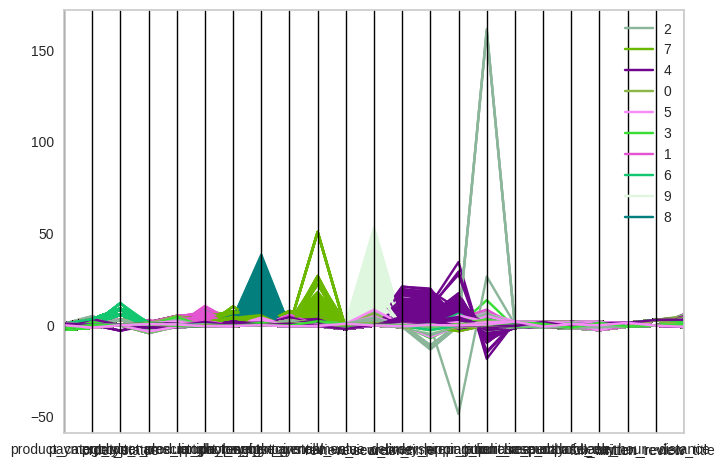

In [ ]:
# https://stackoverflow.com/questions/46844654/how-to-visualize-kmeans-clustering-on-multidimensional-data
plt.figure()
pd.plotting.parallel_coordinates(df_clusters, 'cluster_num')
plt.show()

In [ ]:
# illisible mais il y a de l'idée... à creuser

In [ ]:
# autre idée de visualisation -> pairplot et colorer par cluster

# Pairplot
plt.figure()
#sns.pairplot(df_clusters, hue = 'cluster_num') # sera surement trop lourd, à faire avec df réduit
plt.show()

In [ ]:
# Idées de graphs
# https://echarts.apache.org/examples/en/index.html#chart-type-line

In [ ]:
# Plotter chaque feature

df_clusters['Constant'] = 'patate' # juste là pour 'accrocher' mon graph en x
df_clusters.shape # pour voir combien de features

(116467, 25)

In [ ]:
df_clusters.head()

,product_category,payment_type,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,cluster_num,Constant
0,-0.13984,0.1137,-0.12521,-0.77904,0.54849,-0.70603,1.73278,-0.12925,-0.33947,-0.09498,-0.03169,0.18454,-0.39232,0.07997,1.10374,-0.63577,-0.31827,-0.89104,0.05171,0.04499,-0.84907,-0.3646,-0.55255,2,patate
1,-0.13984,0.1137,-0.12521,-0.57858,0.33427,0.46264,2.11981,-0.12925,1.82064,0.61434,0.69639,0.90602,0.44313,0.38591,-0.00349,-0.02643,-1.55593,0.63880,-0.41016,0.98383,-0.84907,-0.3646,-0.37934,7,patate
2,-0.13984,0.1137,-0.12521,0.62418,0.26183,-0.70603,1.62303,-0.12925,1.46063,-0.05414,0.69639,-0.27197,1.44528,1.29965,5.32492,-1.42192,-0.31827,1.14875,0.39812,0.23275,-0.84907,-0.3646,-1.02037,4,patate
3,-0.13984,0.1137,-0.12521,-0.07743,0.43290,-0.70603,2.65009,-0.12925,-0.69948,0.00442,0.69639,0.16753,0.26609,-0.09560,3.18031,-0.55526,-0.93710,-0.89104,-0.29469,0.23275,-0.84907,-0.3646,-1.04622,7,patate
4,-2.65931,0.1137,-0.12521,1.22557,-0.58272,-0.70603,0.81389,-0.12925,1.82064,0.30133,0.69639,0.40517,-0.11039,0.61814,-0.45935,-0.39031,0.30056,1.65870,1.55280,-1.08163,1.17776,2.7427,-0.64941,0,patate


In [ ]:
# Plotter chaque feature

df_clusters['Constant'] = 'patate' # juste là pour 'accrocher' mon graph en x

f, axes = plt.subplots(4, 5, figsize = (20, 25), sharex = False) #create a 4x5 grid of empty figures where we will plot our feature plots. We will have a couple empty ones.
#f, axes = plt.subplots(1, 5, figsize = (20, 25), sharex = False)
f.subplots_adjust(hspace = 0.2, wspace = 0.7) #Scooch em apart, give em some room
#In this for loop, I step through every column that I want to plot. This is a 4x5 grid, so I split this up by rows of 5 in the else if statements
#for i in range(0, len(list(df_clusters))-2): #minus two because I don't want to plot labels or constant
for i in range(0, 5):
    col = df_clusters.columns[i]
    ax = sns.stripplot(x = df_clusters['Constant'], y = df_clusters[col].values, hue = df_clusters['cluster_num'], jitter = True, ax = axes[0, (i)])
    ax.set_title(col)

Error in callback <function flush_figures at 0x7c45c50e1000> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import plotly.graph_objs as go
def plot_radars(data, group):

    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r = data[data[group] == k].iloc[:,1:].values.reshape(-1),
            theta = data.columns[1:],
            fill = 'toself',
            name = 'Cluster ' + str(k)
        ))

    fig.update_layout(
        polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 1]
        )),
        showlegend = True,
        title = {
            'text': 'Comparaison des moyennes par variable des clusters',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color = "blue",
        title_font_size = 18)

    fig.show()

In [ ]:
plot_radars(data = df_clusters,
            group = 'cluster_num')

# trop gourmand en ram -> fait planter la session... essayer avec jeu de données réduit

In [ ]:
# position des centroïdes
# model.cluster_centers_

# model.inertia_ -> somme des distances au centroïdes
# model.score(X) -> idem mais exprimé de manière négative

In [ ]:
# autres algo à tester:
# - DBSCAN
# - AgglomerativeClustering
# - Spectral Clustering

## ACP

In [ ]:
# Df total
df_std.shape

In [ ]:
# Réduction dimmensionnelle avec 'Principal Component Analysis'
pca = PCA()
df_pca = pca.fit_transform(df_std)
df_pca

In [ ]:
# Représentation graphique
fig = plt.figure(1, figsize = (12, 4))
plt.bar(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_)
plt.ylim(0, 1.05*100)
plt.plot(range(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_), 's-')
plt.ylabel('Pourcentage de variance')
plt.xlabel('Nombre de composantes')
plt.title('Variance expliqué par PCA')
plt.show()

In [ ]:
# meh

In [ ]:
# autre représentation de la variance expliquée :
plt.figure(figsize = (12, 4))
sns.barplot(x = np.arange(1, len(pca.explained_variance_ratio_) + 1),
            y = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# Scree plot
# ( = line plot of the eigenvalues of factors or principal components in an analysis)

ind = np.arange(0, 24)
(fig, ax) = plt.subplots(figsize = (8, 6))
sns.pointplot(x = ind, y = pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [ ]:
# Test en ne gardant que 2 dimensions :

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_std)

In [ ]:
print('Explained variance regarding first dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[0]))
print('Explained variance regarding second dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[1]))
print('Total variance included in those 2 dimensions : ' + '{:.1%}'.format(pca.explained_variance_ratio_.sum()))

In [ ]:
# nuuuuuul

In [ ]:
# Test en conservant 90% de la variance

pca_90 = PCA(n_components = 0.90)  # 90% de la variance
df_pca_90 = pca_90.fit_transform(df_std)

# Mise sous forme de DataFrame
df_pca_90 = pd.DataFrame(df_pca_90, columns = ['Composante_' + str(i) for i in range(df_pca_90.shape[1])])
df_pca_90.shape

In [ ]:
# 32 variables...

In [ ]:
# Plot the correlation circle
from matplotlib.patches import Ellipse

def plot_correlation_circle(pca, features, dimensions = (0, 1), scale_factor = 1):
    num_features = len(features)
    num_principal_components = pca.components_.shape[0]

    if dimensions[0] >= num_principal_components or dimensions[1] >= num_principal_components:
        raise ValueError('Invalid dimensions. Ensure that dimensions are within the range of available principal components.')

    plt.figure(figsize = (10, 10))

    # Scatter plot (avec transparence)
    plt.scatter(pca.components_[dimensions[0], :],
                pca.components_[dimensions[1], :],
                alpha = 0.7)

    # Plot arrows
    for i in range(num_features):
        plt.arrow(0,
                  0,
                  pca.components_[dimensions[0], i],
                  pca.components_[dimensions[1], i],
                  head_width = 0.05,
                  head_length = 0.05,
                  fc = 'grey',
                  ec = 'grey',
                  alpha = 0.5)

        plt.text(pca.components_[dimensions[0], i] * scale_factor,
                 pca.components_[dimensions[1], i] * scale_factor,
                 features[i],
                 ha = 'left',
                 va = 'bottom',
                 fontsize = 8)

    # Add circle patch
    ellipse = Ellipse((0, 0),
                      2,
                      2,
                      edgecolor = 'black',
                      facecolor = 'none',
                      linewidth = 2)
    plt.gca().add_patch(ellipse)

    # Add reference lines
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 1)
    plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)

    # Set axis labels
    plt.xlabel(f'Principal Component {dimensions[0] + 1}')
    plt.ylabel(f'Principal Component {dimensions[1] + 1}')

    # Set plot title
    plt.title('Correlation Circle')

# Plot correlation circle using the first two principal components
plot_correlation_circle(pca_90, features = df_std.columns, dimensions = (0, 1))

plt.show()

In [ ]:
# illisible...

In [ ]:
# à tester :
"""
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/

from mlxtend.plotting import plot_pca_correlation_graph

X, y = df_pca

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended

feature_names = [
  'sepal length',
  'sepal width',
  'petal length',
  'petal width']

figure, correlation_matrix = plot_pca_correlation_graph(X_norm,
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

correlation_matrix"""

In [ ]:
# https://nirpyresearch.com/pca-correlation-circle/
# regarder ça, super interessant

# ARI Score

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
#https://amueller.github.io/aml/04-model-evaluation/17-cluster-evaluation.html

In [ ]:
# https://reval.readthedocs.io/en/latest/

In [ ]:
# https://github.com/FlorentF9/skstab